In [1]:
%load_ext autoreload
%autoreload 2

import os, sys
import argparse, cv2, logging, pdb
import matplotlib.pyplot as plt, numpy as np
import focus_stacking.registration.ecc as ecc
import focus_stacking.utils.images as im_utils
import focus_stacking.utils.data_loader as data_loader
from focus_stacking.utils.pyramids import StackPyramid, Pyramid
import focus_stacking.utils.pyramids
import focus_stacking.energy.energy as energies
import focus_stacking.fusion.fusion as fusion
import pywt

align_max_iters = 50
align_eps = 1e-3
DATA_ROOT = '/n/fs/3d-indoor/macro_data/focus_stacks'

logger = logging.getLogger(__name__)


In [2]:
aux_out_dir = '/n/fs/3d-indoor/tmp_outdir/aux/'
registered_images = data_loader.load_images_from_dir(aux_out_dir, match='reg_*.jpg')

In [3]:
from focus_stacking.utils.pyramids import WaveletPyramid

In [24]:
b_ims = [im[...,0].astype(np.float32)/255. for im in registered_images]
b_stack = StackPyramid(images=b_ims, levels=5, kernel=None, pyramid_type='wavelet', wvt_name='db6')
for pyramid in b_stack.pyramids:
    pyramid.compute_energy_for_levels(-1, 'image', 'variance', energy_key='variance', ksize=5, im_color=False)
    for level_id in range(pyramid.num_levels):
        pyramid.compute_energy_for_levels(level_id, 'LH', 'variance', energy_key='LH_variance', ksize=5, im_color=False)
        pyramid.compute_energy_for_levels(level_id, 'HL', 'variance', energy_key='HL_variance', ksize=5, im_color=False)
        pyramid.compute_energy_for_levels(level_id, 'HH', 'variance', energy_key='HH_variance', ksize=5, im_color=False)
LH_levels = []
HL_levels = []
HH_levels = []
for level_id in range(b_stack.pyramids[0].num_levels):
    LH_layer = fusion.fuse_max([pyramid.levels[level_id]['LH']**2 for pyramid in b_stack.pyramids],
                                [pyramid.levels[level_id]['LH'].astype(np.float32)[...,np.newaxis] for pyramid in b_stack.pyramids])
    HL_layer = fusion.fuse_max([pyramid.levels[level_id]['HL']**2 for pyramid in b_stack.pyramids],
                                [pyramid.levels[level_id]['HL'].astype(np.float32)[...,np.newaxis] for pyramid in b_stack.pyramids])
    HH_layer = fusion.fuse_max([pyramid.levels[level_id]['HH']**2 for pyramid in b_stack.pyramids],
                                [pyramid.levels[level_id]['HH'].astype(np.float32)[...,np.newaxis] for pyramid in b_stack.pyramids])
    LH_levels.append(LH_layer)
    HL_levels.append(HL_layer)
    HH_levels.append(HH_layer)
fuse_base = fusion.fuse_max([pyramid.levels[-1]['variance'] for pyramid in b_stack.pyramids],
                                [pyramid.levels[-1]['image'].astype(np.float32)[...,np.newaxis] for pyramid in b_stack.pyramids])
recon_levels = [{'LH': LH_levels[i][...,0],
  'HL': HL_levels[i][...,0],
  'HH': HH_levels[i][...,0]} for i in range(len(LH_levels))]
recon_levels.append({'image': fuse_base[...,0]})
recon_pyramid = WaveletPyramid(levels=recon_levels, wvt_name='db6')
fused_b = recon_pyramid.reconstruct()

making pyramid
making pyramid
making pyramid
making pyramid
making pyramid
making pyramid
making pyramid
making pyramid
making pyramid
(155, 228) (155, 228) (155, 228)
(300, 445) (300, 445) (300, 445)
(589, 879) (589, 879) (589, 879)
(1168, 1748) (1168, 1748) (1168, 1748)
(2325, 3485) (2325, 3485) (2325, 3485)


In [25]:
g_ims = [im[...,1].astype(np.float32)/255. for im in registered_images]
g_stack = StackPyramid(images=g_ims, levels=5, kernel=None, pyramid_type='wavelet', wvt_name='db6')
for pyramid in g_stack.pyramids:
    pyramid.compute_energy_for_levels(-1, 'image', 'variance', energy_key='variance', ksize=5, im_color=False)
    for level_id in range(pyramid.num_levels):
        pyramid.compute_energy_for_levels(level_id, 'LH', 'variance', energy_key='LH_variance', ksize=5, im_color=False)
        pyramid.compute_energy_for_levels(level_id, 'HL', 'variance', energy_key='HL_variance', ksize=5, im_color=False)
        pyramid.compute_energy_for_levels(level_id, 'HH', 'variance', energy_key='HH_variance', ksize=5, im_color=False)
LH_levels = []
HL_levels = []
HH_levels = []
for level_id in range(g_stack.pyramids[0].num_levels):
    LH_layer = fusion.fuse_max([pyramid.levels[level_id]['LH']**2 for pyramid in g_stack.pyramids],
                                [pyramid.levels[level_id]['LH'].astype(np.float32)[...,np.newaxis] for pyramid in g_stack.pyramids])
    HL_layer = fusion.fuse_max([pyramid.levels[level_id]['HL']**2 for pyramid in g_stack.pyramids],
                                [pyramid.levels[level_id]['HL'].astype(np.float32)[...,np.newaxis] for pyramid in g_stack.pyramids])
    HH_layer = fusion.fuse_max([pyramid.levels[level_id]['HH']**2 for pyramid in g_stack.pyramids],
                                [pyramid.levels[level_id]['HH'].astype(np.float32)[...,np.newaxis] for pyramid in g_stack.pyramids])
    LH_levels.append(LH_layer)
    HL_levels.append(HL_layer)
    HH_levels.append(HH_layer)
fuse_base = fusion.fuse_max([pyramid.levels[-1]['variance'] for pyramid in g_stack.pyramids],
                                [pyramid.levels[-1]['image'].astype(np.float32)[...,np.newaxis] for pyramid in g_stack.pyramids])
recon_levels = [{'LH': LH_levels[i][...,0],
  'HL': HL_levels[i][...,0],
  'HH': HH_levels[i][...,0]} for i in range(len(LH_levels))]
recon_levels.append({'image': fuse_base[...,0]})
recon_pyramid = WaveletPyramid(levels=recon_levels, wvt_name='db6')
fused_g = recon_pyramid.reconstruct()

making pyramid
making pyramid
making pyramid
making pyramid
making pyramid
making pyramid
making pyramid
making pyramid
making pyramid
(155, 228) (155, 228) (155, 228)
(300, 445) (300, 445) (300, 445)
(589, 879) (589, 879) (589, 879)
(1168, 1748) (1168, 1748) (1168, 1748)
(2325, 3485) (2325, 3485) (2325, 3485)


In [26]:
pyramid.levels[level_id]['LH']

array([[-6.80263015e-03, -6.10629423e-03, -5.99915767e-03, ...,
        -4.50746884e-04,  2.01275270e-05,  5.71531535e-04],
       [ 6.26296131e-03,  5.77346655e-03,  5.60028758e-03, ...,
         8.06841999e-05,  1.19171615e-04, -5.13686216e-04],
       [-4.80988622e-02, -4.19240482e-02, -4.18519527e-02, ...,
        -5.60310297e-03,  1.23494153e-03,  3.92014533e-03],
       ...,
       [ 3.59952226e-02,  4.08228152e-02,  4.04081829e-02, ...,
        -1.24614965e-02, -2.57277619e-02, -2.44270414e-02],
       [-3.52555327e-02, -3.88599336e-02, -3.89748700e-02, ...,
         1.73085295e-02,  7.42699392e-03,  1.44526009e-02],
       [ 4.83233668e-02,  5.58760613e-02,  5.69356754e-02, ...,
         9.08672810e-03,  7.57888984e-03,  1.62463598e-02]], dtype=float32)

In [27]:
r_ims = [im[...,2].astype(np.float32)/255. for im in registered_images]
r_stack = StackPyramid(images=r_ims, levels=5, kernel=None, pyramid_type='wavelet', wvt_name='db6')
for pyramid in r_stack.pyramids:
    pyramid.compute_energy_for_levels(-1, 'image', 'variance', energy_key='variance', ksize=5, im_color=False)
    for level_id in range(pyramid.num_levels):
        pyramid.compute_energy_for_levels(level_id, 'LH', 'variance', energy_key='LH_variance', ksize=5, im_color=False)
        pyramid.compute_energy_for_levels(level_id, 'HL', 'variance', energy_key='HL_variance', ksize=5, im_color=False)
        pyramid.compute_energy_for_levels(level_id, 'HH', 'variance', energy_key='HH_variance', ksize=5, im_color=False)
LH_levels = []
HL_levels = []
HH_levels = []
for level_id in range(r_stack.pyramids[0].num_levels):
    LH_layer = fusion.fuse_max([pyramid.levels[level_id]['LH']**2 for pyramid in r_stack.pyramids],
                                [pyramid.levels[level_id]['LH'].astype(np.float32)[...,np.newaxis] for pyramid in r_stack.pyramids])
    HL_layer = fusion.fuse_max([pyramid.levels[level_id]['HL']**2 for pyramid in r_stack.pyramids],
                                [pyramid.levels[level_id]['HL'].astype(np.float32)[...,np.newaxis] for pyramid in r_stack.pyramids])
    HH_layer = fusion.fuse_max([pyramid.levels[level_id]['HH']**2 for pyramid in r_stack.pyramids],
                                [pyramid.levels[level_id]['HH'].astype(np.float32)[...,np.newaxis] for pyramid in r_stack.pyramids])
    LH_levels.append(LH_layer)
    HL_levels.append(HL_layer)
    HH_levels.append(HH_layer)
fuse_base = fusion.fuse_max([pyramid.levels[-1]['variance'] for pyramid in r_stack.pyramids],
                                [pyramid.levels[-1]['image'].astype(np.float32)[...,np.newaxis] for pyramid in r_stack.pyramids])
recon_levels = [{'LH': LH_levels[i][...,0],
  'HL': HL_levels[i][...,0],
  'HH': HH_levels[i][...,0]} for i in range(len(LH_levels))]
recon_levels.append({'image': fuse_base[...,0]})
recon_pyramid = WaveletPyramid(levels=recon_levels, wvt_name='db6')
fused_r = recon_pyramid.reconstruct()

making pyramid
making pyramid
making pyramid
making pyramid
making pyramid
making pyramid
making pyramid
making pyramid
making pyramid
(155, 228) (155, 228) (155, 228)
(300, 445) (300, 445) (300, 445)
(589, 879) (589, 879) (589, 879)
(1168, 1748) (1168, 1748) (1168, 1748)
(2325, 3485) (2325, 3485) (2325, 3485)


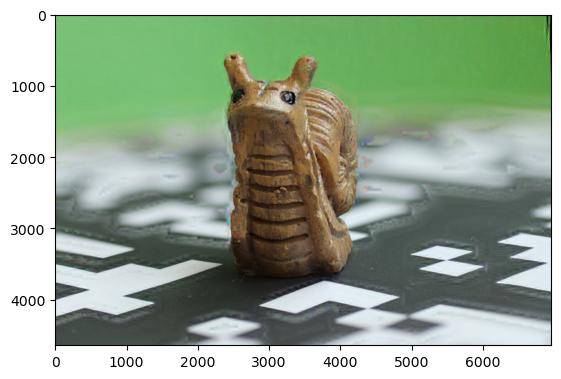

In [28]:
fused_im = np.stack([fused_r, fused_g, fused_b], axis=-1)
plt.imshow(fused_im)

In [143]:
stack_pyramid.pyramids[0].levels[-1]['image'].shape

(155, 228)

In [189]:
for pyramid in stack_pyramid.pyramids:
    pyramid.compute_energy_for_levels(-1, 'image', 'variance', energy_key='variance', ksize=5, im_color=False)
    for level_id in range(pyramid.num_levels):
        pyramid.compute_energy_for_levels(level_id, 'LH', 'variance', energy_key='LH_variance', ksize=5, im_color=False)
        pyramid.compute_energy_for_levels(level_id, 'HL', 'variance', energy_key='HL_variance', ksize=5, im_color=False)
        pyramid.compute_energy_for_levels(level_id, 'HH', 'variance', energy_key='HH_variance', ksize=5, im_color=False)

[[20.682434  20.677557  20.67648   ... 16.142853  16.148546  16.144453 ]
 [20.687672  20.68282   20.681812  ... 16.14614   16.144203  16.141459 ]
 [20.688993  20.684406  20.683441  ... 16.146324  16.143837  16.141533 ]
 ...
 [ 9.553743   9.5534315  9.553022  ... 26.6418    26.01889   25.907412 ]
 [ 9.506722   9.5006275  9.500303  ... 27.064423  26.61538   26.540703 ]
 [ 9.460902   9.451996   9.451988  ... 27.280445  26.919598  26.86553  ]]
[[ 8.2403369e-04 -5.3443597e-04 -2.7158682e-03 ...  1.7232159e-03
   8.5088279e-05 -1.3625030e-03]
 [ 2.7723864e-04  1.9303357e-04  2.3008457e-03 ...  2.3823477e-04
   1.0150312e-03  2.9287194e-03]
 [ 2.3304457e-03  2.3102615e-04 -7.7893992e-04 ...  1.9338323e-03
   1.4636805e-04  6.2609027e-04]
 ...
 [-7.3147980e-03  5.5659823e-03 -4.6321834e-03 ... -1.3369779e-04
  -3.2068489e-03 -6.4442749e-03]
 [ 3.2071301e-03 -3.2400598e-03 -2.7719892e-03 ... -4.6477106e-04
   3.2397893e-03  2.1475514e-03]
 [ 2.0572022e-03  2.5114336e-03  1.3713042e-02 ... -2.66

In [190]:
LH_levels = []
HL_levels = []
HH_levels = []
for level_id in range(stack_pyramid.pyramids[0].num_levels):
    LH_layer = fusion.fuse_max([pyramid.levels[level_id]['LH_variance'] for pyramid in stack_pyramid.pyramids],
                                [pyramid.levels[level_id]['LH'].astype(np.float32)[...,np.newaxis] for pyramid in stack_pyramid.pyramids])
    HL_layer = fusion.fuse_max([pyramid.levels[level_id]['HL_variance'] for pyramid in stack_pyramid.pyramids],
                                [pyramid.levels[level_id]['HL'].astype(np.float32)[...,np.newaxis] for pyramid in stack_pyramid.pyramids])
    HH_layer = fusion.fuse_max([pyramid.levels[level_id]['HH_variance'] for pyramid in stack_pyramid.pyramids],
                                [pyramid.levels[level_id]['HH'].astype(np.float32)[...,np.newaxis] for pyramid in stack_pyramid.pyramids])
    LH_levels.append(LH_layer)
    HL_levels.append(HL_layer)
    HH_levels.append(HH_layer)

In [187]:
len(stack_pyramid.pyramids[0].levels)

6

In [191]:
fuse_base = fusion.fuse_max([pyramid.levels[-1]['variance'] for pyramid in stack_pyramid.pyramids],
                                [pyramid.levels[-1]['image'].astype(np.float32)[...,np.newaxis] for pyramid in stack_pyramid.pyramids])

In [192]:
fuse_base = fuse_base[...,0]

In [193]:
recon_levels = [{'LH': LH_levels[i][...,0],
  'HL': HL_levels[i][...,0],
  'HH': HH_levels[i][...,0]} for i in range(len(LH_levels))]

In [194]:
recon_levels.append({'image': fuse_base})

In [195]:
recon_pyramid = WaveletPyramid(levels=recon_levels, wvt_name='db6')

In [182]:
for i in range(len(stack_pyramid.pyramids[0].levels)):
    print(stack_pyramid.pyramids[0].levels[i]['image'].shape)


(4640, 6960)
(2325, 3485)
(1168, 1748)
(589, 879)
(300, 445)
(155, 228)


In [176]:
recon_pyramid.levels[3]['LH'].shape

(300, 445)

In [185]:
stack_pyramid.pyramids[0].levels[-1]['image'].shape

(155, 228)

In [183]:
stack_pyramid.pyramids[0].reconstruct()

(155, 228) (155, 228) (155, 228)
(300, 445) (300, 445) (300, 445)
(589, 879) (589, 879) (589, 879)
(1168, 1748) (1168, 1748) (1168, 1748)
(2325, 3485) (2325, 3485) (2325, 3485)
(155, 228)


array([[0.64651763, 0.64651763, 0.6465608 , ..., 0.50061965, 0.5045413 ,
        0.50454134],
       [0.6543609 , 0.6465177 , 0.6465607 , ..., 0.50061965, 0.5045412 ,
        0.50061977],
       [0.654404  , 0.6465608 , 0.64263916, ..., 0.501749  , 0.50567055,
        0.501749  ],
       ...,
       [0.2973372 , 0.29733717, 0.29341567, ..., 0.8357138 , 0.8348198 ,
        0.8348199 ],
       [0.30238822, 0.29062346, 0.2827803 , ..., 0.8368435 , 0.83481985,
        0.83481985],
       [0.29062355, 0.28670186, 0.29454497, ..., 0.84076506, 0.8387414 ,
        0.84266305]], dtype=float32)

In [196]:
fused_im = recon_pyramid.reconstruct()

(155, 228) (155, 228) (155, 228)
(300, 445) (300, 445) (300, 445)
(589, 879) (589, 879) (589, 879)
(1168, 1748) (1168, 1748) (1168, 1748)
(2325, 3485) (2325, 3485) (2325, 3485)
(155, 228)


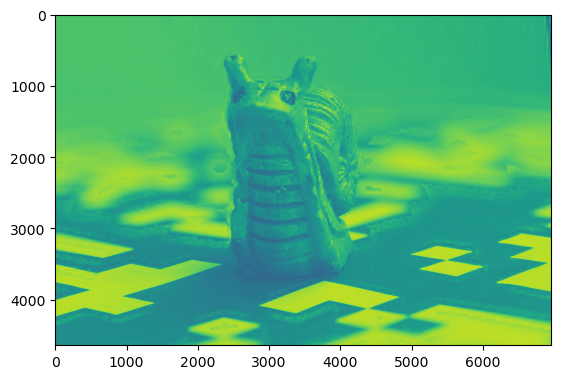

In [197]:
plt.imshow(fused_im)

In [77]:
res[2][0].shape

(2325, 3485)

In [149]:
len(stack_pyramid.pyramids[0].levels)

6

In [142]:
stack_pyramid.pyramids[0].reconstruct()

(155, 228) (155, 228) (155, 228)
(300, 445) (300, 445) (300, 445)
(589, 879) (589, 879) (589, 879)
(1168, 1748) (1168, 1748) (1168, 1748)
(2325, 3485) (2325, 3485) (2325, 3485)
(155, 228)


array([[0.64651763, 0.64651763, 0.6465608 , ..., 0.50061965, 0.5045413 ,
        0.50454134],
       [0.6543609 , 0.6465177 , 0.6465607 , ..., 0.50061965, 0.5045412 ,
        0.50061977],
       [0.654404  , 0.6465608 , 0.64263916, ..., 0.501749  , 0.50567055,
        0.501749  ],
       ...,
       [0.2973372 , 0.29733717, 0.29341567, ..., 0.8357138 , 0.8348198 ,
        0.8348199 ],
       [0.30238822, 0.29062346, 0.2827803 , ..., 0.8368435 , 0.83481985,
        0.83481985],
       [0.29062355, 0.28670186, 0.29454497, ..., 0.84076506, 0.8387414 ,
        0.84266305]], dtype=float32)